## Grover's algorithm
### 452648 mod 16 = 8

In [10]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMTVChain
from qiskit.circuit.library import MCMT
from math import pi, sqrt

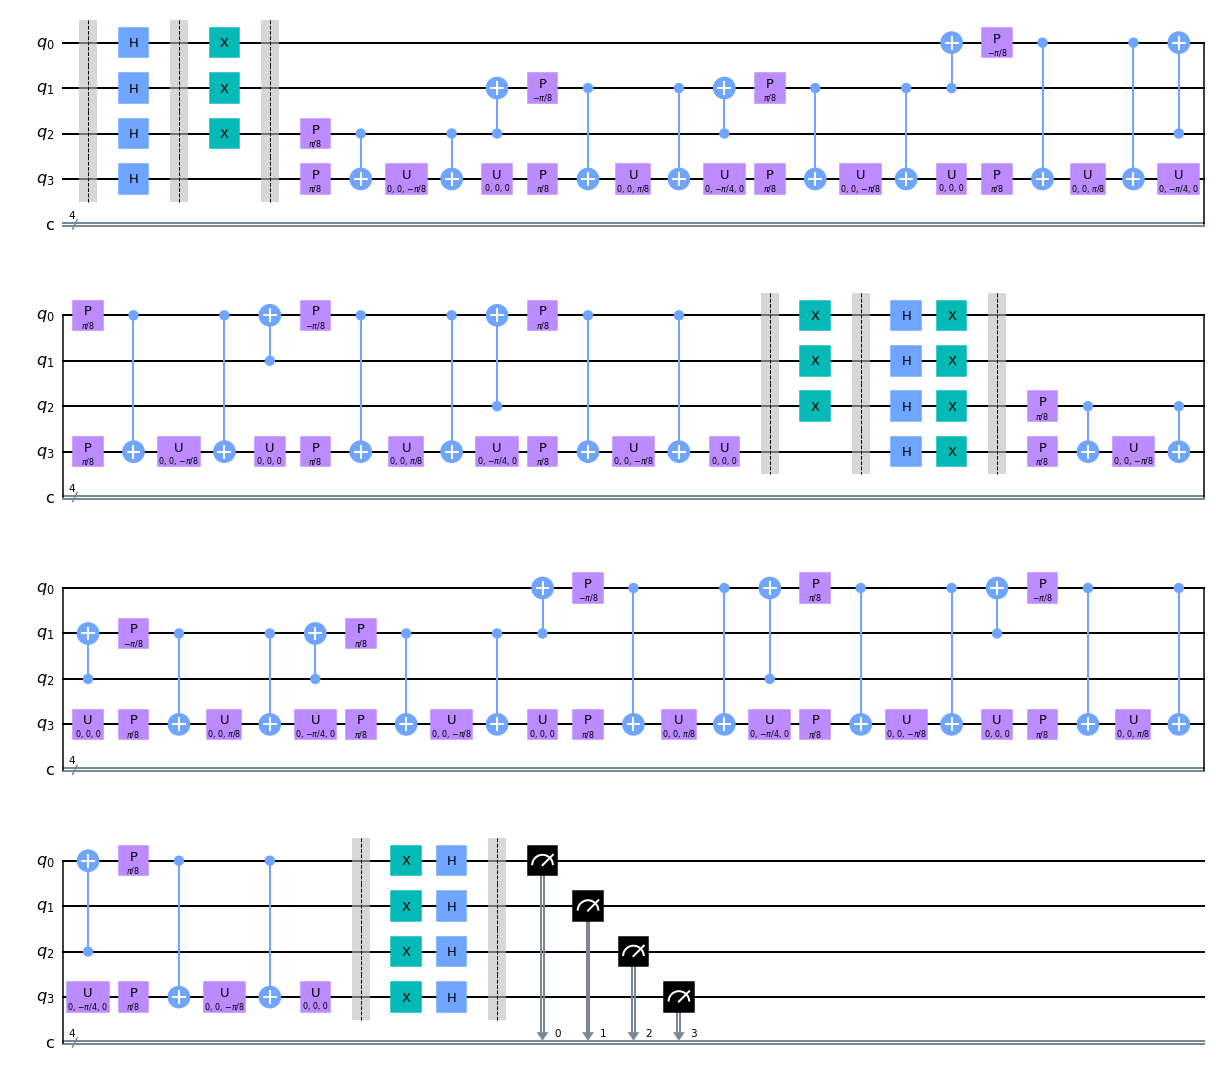

In [11]:
def get_multi_controlled_z_gate(num_control, num_target):
    c3z = MCMT('z', num_ctrl_qubits=num_control, num_target_qubits=num_target)
    return c3z.decompose()

def create_circuit(n):
    circuit = QuantumCircuit(n, n)
            
    #circuit.x(n)
    
    circuit.barrier()
    circuit.h(range(n))
    circuit.barrier()
    
    circuit.x(range(0, 3))
    circuit.barrier()
    #circuit.compose(MCMT("z", 3, 1), inplace=True)
    circuit.compose(get_multi_controlled_z_gate(3, 1), inplace=True)

    circuit.barrier()
    circuit.x(range(0, 3))
    
    circuit.barrier()
    circuit.h(range(n))
    circuit.x(range(n))
    circuit.barrier()

    #circuit.compose(MCMT("z", 3, 1), inplace=True)
    circuit.compose(get_multi_controlled_z_gate(3, 1), inplace=True)
    
    circuit.barrier()
    circuit.x(range(n))
    circuit.h(range(n))
    circuit.barrier()
    circuit.measure(range(n), range(n))
    
    return circuit

required_bits = 4
circ = create_circuit(required_bits)
circ.draw(output='mpl')

0000 -> 31 measurements
0001 -> 40 measurements
0010 -> 38 measurements
0011 -> 45 measurements
0100 -> 27 measurements
0101 -> 34 measurements
0110 -> 26 measurements
0111 -> 31 measurements
1000 -> 470 measurements
1001 -> 32 measurements
1010 -> 32 measurements
1011 -> 36 measurements
1100 -> 37 measurements
1101 -> 35 measurements
1110 -> 45 measurements
1111 -> 41 measurements


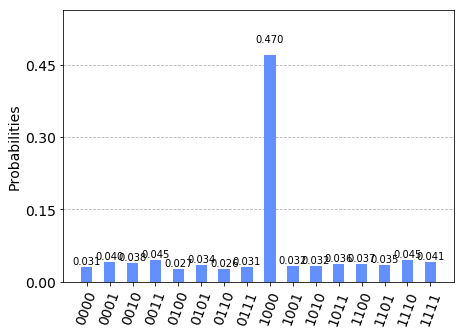

In [12]:
def get_results(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    qobj = assemble(circuit, shots=1000)
    result = simulator.run(qobj).result().get_counts()
    sorted_result = {key: value for key, value in sorted(result.items())}
    return sorted_result


def print_results(result):
    for res in result:
        res_string = ("{} -> {} measurements").format(res, result[res])
        print(res_string)
        

result = get_results(circ)
print_results(result)
plot_histogram(result)